In [2]:
# =============================================================================
# # 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Set a visual style for the plots
sns.set_style("whitegrid")

--- First 5 Rows of the Combined Dataset ---
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
--- Combined Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   121 non-null    float64
 1   Scores  121 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.0 KB
--- Visualizing Data Relationship ---


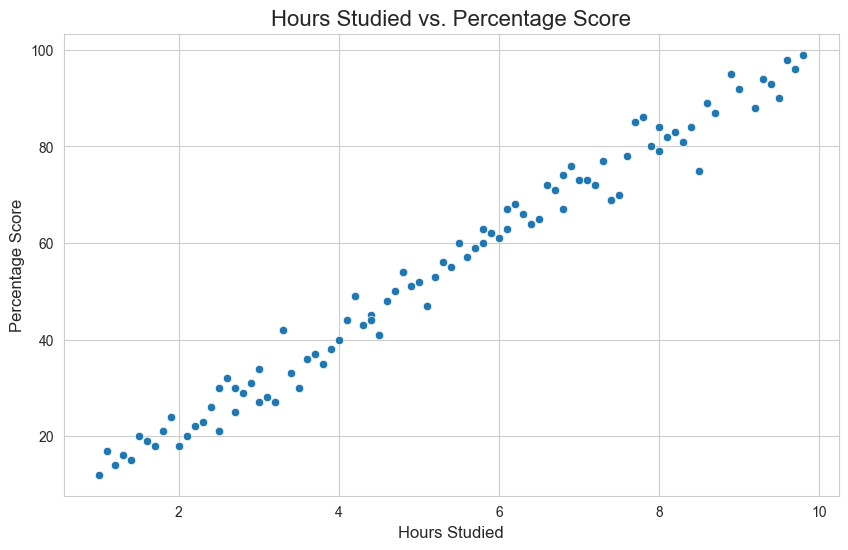

In [6]:
# =============================================================================
# # 2. DATA LOADING AND MERGING
# =============================================================================
# Load both datasets from their respective .csv files
# Make sure both files are in the same directory as your script or notebook
try:
    df1 = pd.read_csv('data/score.csv')
    df2 = pd.read_csv('data/score_updated.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Please make sure both 'score.csv' and 'score_updates.csv' are in the correct directory.")
    exit()

# Combine the two DataFrames into a single one
# pd.concat stacks them vertically.
# ignore_index=True resets the index of the combined DataFrame.
df = pd.concat([df1, df2], ignore_index=True)


# --- INITIAL EXPLORATION OF THE COMBINED DATA ---

# Display the first 5 rows of the final dataset
print("--- First 5 Rows of the Combined Dataset ---")
print(df.head())

# Get a summary of the combined dataframe
print("--- Combined Dataset Information ---")
df.info()

# Visualize the relationship between Hours and Scores
print("--- Visualizing Data Relationship ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Hours Studied vs. Percentage Score', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Percentage Score', fontsize=12)
plt.show()
# Insight: The scatter plot shows a clear, positive linear relationship.

In [5]:
# =============================================================================
# # 3. DATA PREPARATION
# =============================================================================
# Prepare the data for Scikit-Learn
# X will be our feature (independent variable)
# y will be our target (dependent variable)
X = df[['Hours']] # Keeps it as a DataFrame
y = df['Scores']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Data Splitting ---")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

--- Data Splitting ---
Training set size: 96 samples
Testing set size: 25 samples


In [7]:
# =============================================================================
# # 4. TRAINING THE LINEAR REGRESSION MODEL
# =============================================================================
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("--- Model Training Complete ---")

--- Model Training Complete ---


--- Model Details ---
Intercept (c): 2.19
Coefficient (m): 9.84

The learned equation is: Score = 9.84 * Hours + 2.19
Interpretation: For every one-hour increase in study time, the model predicts a score increase of 9.84 points.


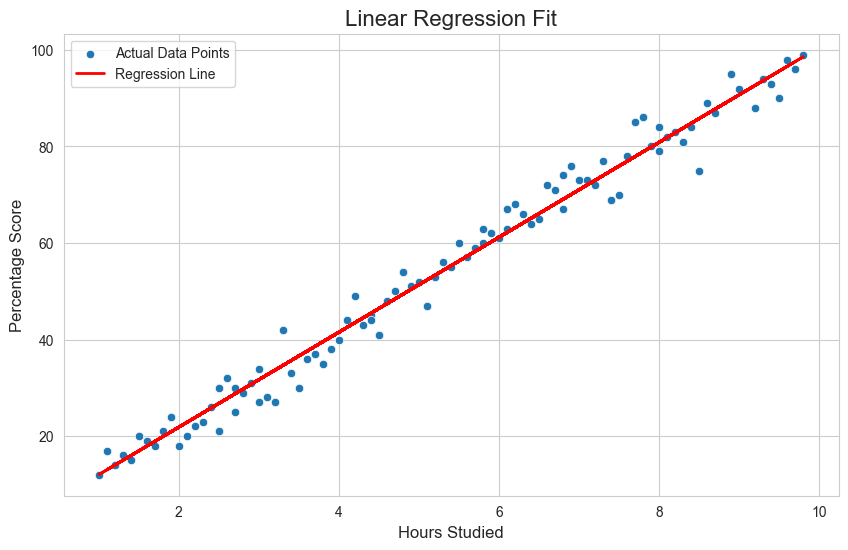

In [9]:
# =============================================================================
# # 5. MODEL INTERPRETATION AND VISUALIZATION
# =============================================================================
# Get the intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_[0]

print("--- Model Details ---")
print(f"Intercept (c): {intercept:.2f}")
print(f"Coefficient (m): {coefficient:.2f}")
print(f"\nThe learned equation is: Score = {coefficient:.2f} * Hours + {intercept:.2f}")
print(f"Interpretation: For every one-hour increase in study time, the model predicts a score increase of {coefficient:.2f} points.")

# Plot the regression line on top of the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours', y='Scores', data=df, label='Actual Data Points')
plt.plot(df['Hours'], model.predict(df[['Hours']]), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Fit', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Percentage Score', fontsize=12)
plt.legend()
plt.savefig('regression_line.png') # Save this plot for your LinkedIn post
plt.show()

--- Attractive Comparison of Actual vs. Predicted Scores ---


,Actual Score,Predicted Score
44,69.00,74.98
47,35.00,39.57
4,30.00,36.62
55,19.00,17.93
26,47.00,52.35
64,45.00,45.47
73,16.00,14.98
10,85.00,77.93
40,95.00,89.73
108,61.00,61.21




--- Model Evaluation Metrics ---
Mean Absolute Error (MAE): 2.77
Mean Squared Error (MSE): 12.73
Root Mean Squared Error (RMSE): 3.57
R-squared (R²): 0.98

Interpretation: The R-squared value of 0.98 means that our model can explain approximately 98% of the variance in student scores.


--- Bar Chart Comparison ---


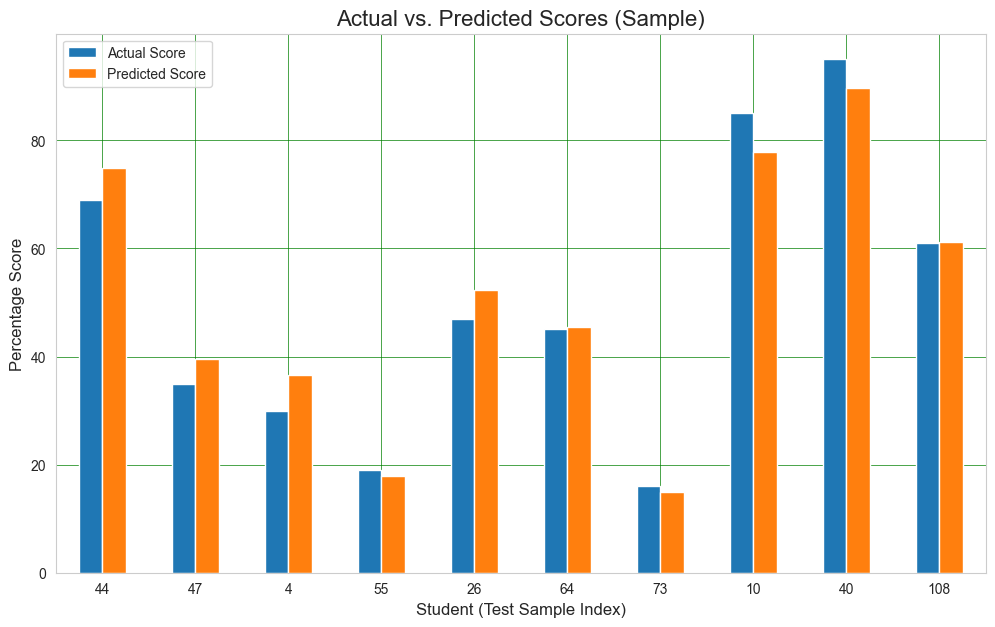

In [11]:
# =============================================================================
# # 6. MAKING PREDICTIONS & EVALUATING THE MODEL
# =============================================================================
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs. predicted values
comparison_df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})


# --- STYLED DATAFRAME FOR ATTRACTIVE OUTPUT ---
# We use the .style attribute to create a visually appealing table.
# This works best in environments like Jupyter Notebook or Google Colab.
styled_df = comparison_df.head(10).style \
    .format({'Actual Score': '{:.2f}', 'Predicted Score': '{:.2f}'}) \
    .background_gradient(cmap='Greens', subset=['Actual Score']) \
    .background_gradient(cmap='Blues', subset=['Predicted Score']) \
    .set_caption('Comparison of Actual vs. Predicted Scores') \
    .set_properties(**{'text-align': 'center', 'font-size': '12pt'})

print("--- Attractive Comparison of Actual vs. Predicted Scores ---")
# In a Jupyter Notebook, the line below will render a beautiful HTML table.
# If you are running this as a standard Python script, you won't see the styling in the terminal.
display(styled_df) # Use display() for styled dataframes in notebooks

print("\n" + "="*50 + "\n")


# --- MODEL EVALUATION METRICS (UNCHANGED) ---
print("--- Model Evaluation Metrics ---")
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"\nInterpretation: The R-squared value of {r2:.2f} means that our model can explain approximately {r2*100:.0f}% of the variance in student scores.")
print("\n" + "="*50 + "\n")

# --- ALTERNATIVE VISUALIZATION: BAR CHART ---
# A bar chart is another great way to visually compare the results.
print("--- Bar Chart Comparison ---")
# We'll plot a sample of the results to keep the chart readable
comparison_sample = comparison_df.head(10)
comparison_sample.plot(kind='bar', figsize=(12, 7))
plt.title('Actual vs. Predicted Scores (Sample)', fontsize=16)
plt.ylabel('Percentage Score', fontsize=12)
plt.xlabel('Student (Test Sample Index)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('actual_vs_predicted_bar_chart.png')
plt.show()